In [2]:
import numpy as np
import pandas as pd

In [3]:
# df_train = pd.read_csv('/Users/runminghuang/Desktop/归档/df_train_wdate_wclusters.csv')
df_train = pd.read_parquet("./datasets/df_train_wdate_wclusters.parquet")
df_train.CLUSTER.unique()

array([ 5,  2,  6,  9,  3, 11,  4,  1,  0, 10,  7,  8], dtype=int32)

In [4]:
df_test = pd.read_parquet("./datasets/df_test_wdate_wclusters.parquet")
df_test.CLUSTER.unique()

array([9, 1, 5, 0, 3, 2], dtype=int32)

In [17]:
df_train.query("DATE == 0")

,STOCK,ID,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,SIG_0,SIG_1,SIG_2,SIG_3,...,SIG_393,SIG_394,SIG_395,SIG_396,SIG_397,SIG_398,SIG_399,RET,DATE,CLUSTER
173,2.0,0.0,18.0,5.0,3.0,44.0,1.0,-1.371559e-02,0.148869,19.0,...,-0.000460,0.011937,0.059652,0.000004,-0.000011,0.000595,-0.000017,True,0,1
250,3.0,1.0,43.0,15.0,6.0,104.0,1.0,3.931553e-02,0.000000,19.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,0,4
303,4.0,2.0,57.0,20.0,8.0,142.0,1.0,7.330628e-03,0.212586,19.0,...,-0.000139,-0.003329,0.043119,0.000044,0.000002,0.000551,0.000163,False,0,3
618,8.0,3.0,1.0,1.0,1.0,2.0,1.0,6.825502e-02,0.201917,19.0,...,0.000765,-0.023482,0.283824,-0.000096,0.000080,0.003328,0.000923,False,0,3
1045,14.0,4.0,36.0,12.0,5.0,92.0,1.0,6.858053e-02,-1.649961,19.0,...,0.018837,-0.121606,5.072003,0.000531,0.002787,0.097902,-0.259484,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417473,5703.0,2372.0,32.0,10.0,4.0,77.0,1.0,-1.959491e-03,0.217857,19.0,...,0.000074,0.003882,0.081964,0.000057,0.000033,0.001331,0.000005,True,0,3
417667,5705.0,2373.0,35.0,12.0,5.0,91.0,1.0,6.938894e-18,0.132717,19.0,...,-0.005475,-4.106426,13.331680,-0.000551,0.007102,0.799567,0.500253,True,0,3
417962,5709.0,2374.0,2.0,1.0,1.0,5.0,1.0,-3.449950e-02,-0.731961,19.0,...,-0.008087,0.032728,2.572468,-0.001549,0.000913,0.000234,-0.046597,True,0,4
418051,5710.0,2375.0,33.0,10.0,4.0,83.0,1.0,-6.225013e-02,-0.880563,19.0,...,0.003242,0.341926,6.495447,-0.004106,-0.000480,0.011359,-0.073651,False,0,3


In [7]:
k = df_train[['STOCK', 'ID', 'SECTOR', 'CLUSTER']]
k

,STOCK,ID,SECTOR,CLUSTER
0,0.0,2377.0,5.0,3
1,0.0,5198.0,5.0,3
2,0.0,8017.0,5.0,3
3,0.0,20826.0,5.0,3
4,0.0,33843.0,5.0,3
...,...,...,...,...
418590,5716.0,391556.0,7.0,3
418591,5716.0,394490.0,7.0,3
418592,5716.0,400150.0,7.0,3
418593,5716.0,403129.0,7.0,3


In [ ]:
a = len(df_train[df_train['CLUSTER'] == 0])
b = len(df_train[df_train['CLUSTER'] == 1])
c = len(df_train[df_train['CLUSTER'] == 2])
d = len(df_train[df_train['CLUSTER'] == 3])
e = len(df_train[df_train['CLUSTER'] == 4])

total = a + b + c + d + e
print(a, b, c, d, e)
print(a/total, b/total, c/total, d/total, e/total)


In [ ]:
a = len(df_test[df_test['CLUSTER'] == 0])
c = len(df_test[df_test['CLUSTER'] == 2])
d = len(df_test[df_test['CLUSTER'] == 3])
e = len(df_test[df_test['CLUSTER'] == 4])

total = a + c + d + e
print(a, c, d, e)
print(a/total, c/total, d/total, e/total)


每个CLUSTER中各SECTOR的数量:
SECTOR   0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0   9.0   \
CLUSTER                                                                       
0         541    588    515   3668   5821    884   6208   9537   5651   484   
1        2475   1212    864   4318   7206   2014  10984  10270  11436   995   
2          10     21      1     14     23      0    151    150     60     0   
3        1458  12627  13392  37943  35155  10612  24947  49508  34089  2570   
4        1820   6816   4195   9530  15314   3785  12833  18438  19607  1506   

SECTOR   10.0  11.0  
CLUSTER              
0         155   417  
1         327    12  
2           0     7  
3        9649  2479  
4        3164   139  

每个CLUSTER中各SECTOR的百分比分布:
SECTOR   0.00%   1.00%   2.00%   3.00%   4.00%   5.00%   6.00%   7.00%   \
CLUSTER                                                                   
0         1.57%   1.71%   1.49%  10.64%  16.89%   2.56%  18.01%  27.67%   
1         4.75%   2

/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_96097/370322918.py:70: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_96097/370322918.py:70: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_96097/370322918.py:70: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_96097/370322918.py:70: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_96097/370322918.py:70: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bt/8q84pc_n5

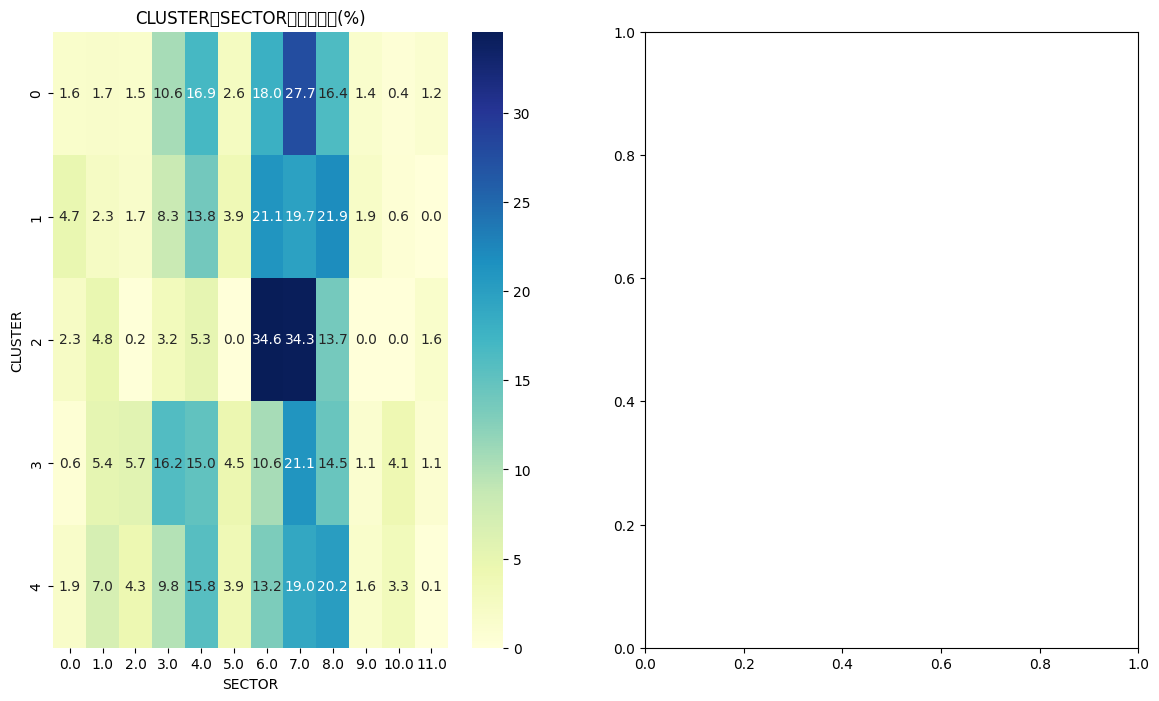

/Users/runminghuang/Documents/GitHub/Transfer_Learning_for_Stock_Prediction/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/runminghuang/Documents/GitHub/Transfer_Learning_for_Stock_Prediction/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/runminghuang/Documents/GitHub/Transfer_Learning_for_Stock_Prediction/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/runminghuang/Documents/GitHub/Transfer_Learning_for_Stock_Prediction/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 215

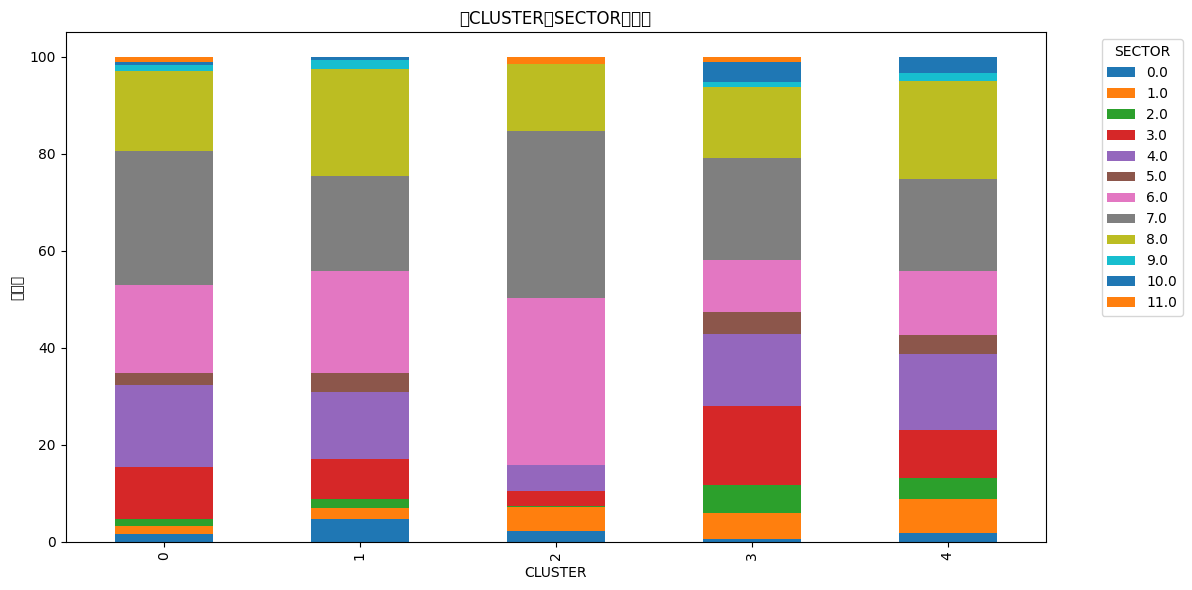


统计相关性:
Chi-squared: 25388.9006
p-value: 0.00000000
Cramer's V: 0.1231 (0表示无关联，1表示完全关联)
统计结论: CLUSTER和SECTOR有统计学显著且中等程度的相关性


{'cross_table': SECTOR   0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0   9.0   \
 CLUSTER                                                                       
 0         541    588    515   3668   5821    884   6208   9537   5651   484   
 1        2475   1212    864   4318   7206   2014  10984  10270  11436   995   
 2          10     21      1     14     23      0    151    150     60     0   
 3        1458  12627  13392  37943  35155  10612  24947  49508  34089  2570   
 4        1820   6816   4195   9530  15314   3785  12833  18438  19607  1506   
 
 SECTOR   10.0  11.0  
 CLUSTER              
 0         155   417  
 1         327    12  
 2           0     7  
 3        9649  2479  
 4        3164   139  ,
 'percent_table': SECTOR       0.0       1.0       2.0        3.0        4.0       5.0   \
 CLUSTER                                                                 
 0        1.569526  1.705881  1.494096  10.641446  16.887638  2.564623   
 1        4.749295  2.

In [6]:
def analyze_cluster_sector_relationship(df):
    """分析CLUSTER与SECTOR之间的关系"""
    # 确保df中有这两列
    if 'CLUSTER' not in df.columns or 'SECTOR' not in df.columns:
        print("数据中缺少CLUSTER或SECTOR列")
        return
    
    # 1. 基本统计: 创建CLUSTER和SECTOR的交叉表
    cross_table = pd.crosstab(df['CLUSTER'], df['SECTOR'])
    
    # 2. 计算百分比: 每个CLUSTER内部各SECTOR的占比
    percent_table = pd.crosstab(df['CLUSTER'], df['SECTOR'], normalize='index') * 100
    
    # 打印基本交叉表
    print("每个CLUSTER中各SECTOR的数量:")
    print(cross_table)
    
    print("\n每个CLUSTER中各SECTOR的百分比分布:")
    # 设置小数位数为2位
    pd.set_option('display.float_format', '{:.2f}%'.format)
    print(percent_table)
    pd.reset_option('display.float_format')
    
    # 3. 找出每个CLUSTER的主导SECTOR(占比最高的)
    dominant_sectors = percent_table.idxmax(axis=1)
    print("\n每个CLUSTER的主导SECTOR:")
    for cluster, sector in dominant_sectors.items():
        percent = percent_table.loc[cluster, sector]
        print(f"CLUSTER {cluster}: 主要是 {sector} ({percent:.2f}%)")
    
    # 4. 计算每个CLUSTER的SECTOR集中度(用前两个主要SECTOR的累计百分比表示)
    concentration = {}
    for cluster in percent_table.index:
        top_sectors = percent_table.loc[cluster].nlargest(2)
        concentration[cluster] = {
            'top_sectors': top_sectors.index.tolist(),
            'top_percents': top_sectors.values.tolist(),
            'cumulative': sum(top_sectors.values)
        }
    
    print("\n各CLUSTER的SECTOR集中度:")
    for cluster, data in concentration.items():
        print(f"CLUSTER {cluster}:")
        print(f"  主要SECTOR: {data['top_sectors'][0]} ({data['top_percents'][0]:.2f}%)")
        print(f"  次要SECTOR: {data['top_sectors'][1]} ({data['top_percents'][1]:.2f}%)")
        print(f"  两者累计占比: {data['cumulative']:.2f}%")
    
    # 5. 可视化
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        plt.figure(figsize=(14, 8))
        
        # 热图展示关联强度
        plt.subplot(1, 2, 1)
        sns.heatmap(percent_table, annot=True, cmap='YlGnBu', fmt='.1f')
        plt.title('CLUSTER与SECTOR的关联热图(%)')
        plt.ylabel('CLUSTER')
        plt.xlabel('SECTOR')
        
        # 堆叠条形图
        plt.subplot(1, 2, 2)
        percent_table.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.title('各CLUSTER中SECTOR的组成')
        plt.xlabel('CLUSTER')
        plt.ylabel('百分比')
        plt.legend(title='SECTOR', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"可视化出错: {str(e)}")
    
    # 6. 统计相关性 (基于Cramer's V测量分类变量相关性)
    from scipy.stats import chi2_contingency
    
    # 计算卡方值和Cramer's V系数
    chi2, p, dof, expected = chi2_contingency(cross_table)
    n = cross_table.sum().sum()
    min_dim = min(cross_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    
    print(f"\n统计相关性:")
    print(f"Chi-squared: {chi2:.4f}")
    print(f"p-value: {p:.8f}")
    print(f"Cramer's V: {cramer_v:.4f} (0表示无关联，1表示完全关联)")
    
    if p < 0.05:
        if cramer_v < 0.1:
            print("统计结论: CLUSTER和SECTOR有统计学显著但很弱的相关性")
        elif cramer_v < 0.3:
            print("统计结论: CLUSTER和SECTOR有统计学显著且中等程度的相关性")
        else:
            print("统计结论: CLUSTER和SECTOR有统计学显著且很强的相关性")
    else:
        print("统计结论: CLUSTER和SECTOR之间没有统计学显著的相关性")
    
    return {
        'cross_table': cross_table,
        'percent_table': percent_table,
        'dominant_sectors': dominant_sectors,
        'concentration': concentration,
        'cramer_v': cramer_v,
        'p_value': p
    }

# 使用函数分析df_train2中的CLUSTER和SECTOR关系
results = analyze_cluster_sector_relationship(df_train)
results

In [34]:
df_test = pd.read_parquet("./datasets/df_test_wdate_wclusters.parquet")
df_test.CLUSTER.unique()

array([4, 0, 2, 3], dtype=int32)

In [30]:
# 检查每列是否相等
for col in df_train.columns:
    if col in df_train2.columns:
        # 先检查数据类型
        type_equal = df_train[col].dtype == df_train2[col].dtype
        
        # 比较列内容
        if type_equal:
            values_equal = df_train[col].equals(df_train2[col])
        else:
            values_equal = False
            
        print(f"Column '{col}': Types equal: {type_equal}, Values equal: {values_equal}")
    else:
        print(f"Column '{col}' not in df_train2")

# 检查df_train2是否有额外的列
for col in df_train2.columns:
    if col not in df_train.columns:
        print(f"Extra column in df_train2: '{col}'")

Column 'STOCK': Types equal: False, Values equal: False
Column 'ID': Types equal: False, Values equal: False
Column 'DATE' not in df_train2
Column 'INDUSTRY': Types equal: False, Values equal: False
Column 'INDUSTRY_GROUP': Types equal: False, Values equal: False
Column 'SECTOR': Types equal: False, Values equal: False
Column 'SUB_INDUSTRY': Types equal: False, Values equal: False
Column 'SIG_0': Types equal: True, Values equal: True
Column 'SIG_1': Types equal: True, Values equal: False
Column 'SIG_2': Types equal: True, Values equal: False
Column 'SIG_3': Types equal: True, Values equal: True
Column 'SIG_4': Types equal: True, Values equal: False
Column 'SIG_5': Types equal: True, Values equal: False
Column 'SIG_6': Types equal: True, Values equal: False
Column 'SIG_7': Types equal: True, Values equal: False
Column 'SIG_8': Types equal: True, Values equal: False
Column 'SIG_9': Types equal: True, Values equal: False
Column 'SIG_10': Types equal: True, Values equal: False
Column 'SIG_

In [31]:
def compare_column_detailed(df1, df2, column_name="SIG_1", decimal_places=4):
    """详细比较两个DataFrame中特定列的差异，保留指定小数位"""
    
    # 检查列是否存在于两个DataFrame中
    if column_name not in df1.columns or column_name not in df2.columns:
        print(f"列 '{column_name}' 不在两个DataFrame中同时存在")
        return
    
    # 检查数据类型
    type1 = df1[column_name].dtype
    type2 = df2[column_name].dtype
    print(f"数据类型比较: df1[{column_name}]: {type1}, df2[{column_name}]: {type2}")
    
    # 确保索引相同，如果不同则创建副本并重置索引
    df1_reset = df1.reset_index(drop=True).copy()
    df2_reset = df2.reset_index(drop=True).copy()
    
    # 创建包含差异的DataFrame，同时格式化值到7位小数
    # 注意：使用格式化字符串只影响显示，不改变实际计算
    comparison_df = pd.DataFrame({
        'df1_index': df1.index,
        'df2_index': df2.index,
        'df1_value': df1[column_name],
        'df2_value': df2[column_name],
        'is_equal': df1[column_name] == df2[column_name]
    })
    
    # 格式化显示时的小数位数
    pd.set_option('display.float_format', f'{{:.{decimal_places}f}}'.format)
    
    # 找出不同的行
    differences = comparison_df[~comparison_df['is_equal']]
    
    # 基本统计信息
    total_rows = len(comparison_df)
    different_rows = len(differences)
    
    print(f"\n统计信息:")
    print(f"总行数: {total_rows}")
    print(f"不同行数: {different_rows}")
    print(f"相同比例: {((total_rows - different_rows) / total_rows) * 100:.2f}%")
    
    # 增加相对差异和绝对差异列(仅当两列都是数值型时)
    if pd.api.types.is_numeric_dtype(df1[column_name]) and pd.api.types.is_numeric_dtype(df2[column_name]):
        differences['absolute_diff'] = (df1[column_name] - df2[column_name]).abs()
        # 处理除以零的情况
        differences['relative_diff'] = differences['absolute_diff'] / differences['df1_value'].replace(0, np.nan)
        differences = differences.sort_values('absolute_diff', ascending=False)
        
        print(f"\n数值差异统计:")
        print(f"最大绝对差异: {differences['absolute_diff'].max():.{decimal_places}f}")
        print(f"平均绝对差异: {differences['absolute_diff'].mean():.{decimal_places}f}")
        print(f"中位数绝对差异: {differences['absolute_diff'].median():.{decimal_places}f}")
    
    # 显示前10个差异行
    if not differences.empty:
        print("\n前10个不同的行:")
        print(differences.head(10))
    else:
        print(f"\n'{column_name}'列在两个DataFrame中完全相同!")
    
    # 恢复默认显示格式
    pd.reset_option('display.float_format')
    
    return differences

# 使用函数比较"SIG_1"列，保留7位小数
differences_sig1 = compare_column_detailed(df_train, df_train2, "SIG_1", decimal_places=7)

数据类型比较: df1[SIG_1]: float64, df2[SIG_1]: float64

统计信息:
总行数: 418595
不同行数: 403972
相同比例: 3.49%

数值差异统计:
最大绝对差异: 0.0000000
平均绝对差异: 0.0000000
中位数绝对差异: 0.0000000

前10个不同的行:
        df1_index  df2_index  df1_value  df2_value  is_equal  absolute_diff  \
305698     305698     305698 -0.0255526 -0.0255526     False      0.0000000   
236457     236457     236457  0.0995799  0.0995799     False      0.0000000   
179706     179706     179706 -0.0512936 -0.0512936     False      0.0000000   
56382       56382      56382  0.1283883  0.1283883     False      0.0000000   
212306     212306     212306 -0.0686392 -0.0686392     False      0.0000000   
220105     220105     220105  0.0309737  0.0309737     False      0.0000000   
350378     350378     350378  0.1234481  0.1234481     False      0.0000000   
134984     134984     134984  0.1049364  0.1049364     False      0.0000000   
49040       49040      49040 -0.1651209 -0.1651209     False      0.0000000   
203434     203434     203434 -0.1280332 -0

/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_60445/2177982335.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['absolute_diff'] = (df1[column_name] - df2[column_name]).abs()
/var/folders/bt/8q84pc_n54g9gbm004mb6xy80000gn/T/ipykernel_60445/2177982335.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['relative_diff'] = differences['absolute_diff'] / differences['df1_value'].replace(0, np.nan)


In [14]:
# df_test = pd.read_csv('/Users/runminghuang/Desktop/归档/df_testing_wdate_wclusters.csv')
df_test = pd.read_parquet("./datasets/df_test_wdate_wclusters.parquet")
df_test.CLUSTER.unique()

array([4, 0, 2, 3], dtype=int32)

In [2]:
x_train = pd.read_csv("./datasets/x_train.csv")
y_train = pd.read_csv("./datasets/y_train.csv")
x_test = pd.read_csv("./datasets/x_test.csv")
y_test = pd.read_csv("./datasets/test_rand.csv")

In [3]:
loaded_train = np.load("./datasets/df_train_signature_data.npz")
loaded_test = np.load("./datasets/df_test_signature_data.npz")

df_train_final = pd.DataFrame(data=loaded_train['data'], columns=loaded_train['features'])
df_test_final = pd.DataFrame(data=loaded_test['data'], columns=loaded_test['features'])

# df_train_new_features = pd.read_parquet("./datasets/df_train_new_features.parquet")
# df_test_new_features = pd.read_parquet("./datasets/df_test_new_features.parquet")

# Merge Date into df_train_final and df_test_final

In [6]:
y_dict_train_RET = y_train.set_index('ID')['RET'].to_dict()
y_dict_test_RET = y_test.set_index('ID')['RET'].to_dict()

x_dict_train_DATE = x_train.set_index('ID')['DATE'].to_dict()
x_dict_test_DATE = x_test.set_index('ID')['DATE'].to_dict()

df_train_final['RET'] = df_train_final['ID'].map(y_dict_train_RET)
df_test_final['RET'] = df_test_final['ID'].map(y_dict_test_RET)
df_train_final['DATE'] = df_train_final['ID'].map(x_dict_train_DATE)
df_test_final['DATE'] = df_test_final['ID'].map(x_dict_test_DATE)

In [17]:
a = pd.read_parquet("./datasets/df_test_wdate_wclusters.parquet")
a

,STOCK,ID,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,SIG_0,SIG_1,SIG_2,SIG_3,...,SIG_33,SIG_34,SIG_35,SIG_36,SIG_37,SIG_38,SIG_39,RET,DATE,CLUSTER
0,0.0,418595.0,37.0,12.0,5.0,94.0,1.0,0.003152,0.153397,19.0,...,-0.004511,0.106446,1.298473,14.503668,3.206502,51.148122,1143.166667,True,2,2
1,0.0,421424.0,37.0,12.0,5.0,94.0,1.0,0.007171,0.066912,19.0,...,-0.253248,-0.019508,0.484244,-10.869411,4.335240,5.629139,1143.166667,False,3,2
2,0.0,424432.0,37.0,12.0,5.0,94.0,1.0,-0.001259,1.475314,19.0,...,-0.044006,0.090060,11.339968,70.819783,1.194616,145.647363,1143.166667,True,8,2
3,0.0,427427.0,37.0,12.0,5.0,94.0,1.0,0.003561,-1.084983,19.0,...,0.418081,-0.012598,1.499223,-31.109610,-0.501721,24.681000,1143.166667,True,12,2
4,0.0,430370.0,37.0,12.0,5.0,94.0,1.0,0.025230,-0.068874,19.0,...,0.606865,0.085593,1.006182,-8.155117,3.648262,-40.306328,1143.166667,False,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198424,5716.0,605110.0,50.0,17.0,7.0,114.0,1.0,0.013955,-0.340761,19.0,...,0.130296,0.173607,1.142757,-0.418090,3.866119,44.256313,1143.166667,False,215,2
198425,5716.0,608080.0,50.0,17.0,7.0,114.0,1.0,0.007808,-0.252318,19.0,...,-0.310529,0.080468,1.450560,-10.455699,-2.301399,-45.116410,1143.166667,True,216,2
198426,5716.0,611029.0,50.0,17.0,7.0,114.0,1.0,-0.000346,-0.143134,19.0,...,0.446819,0.074306,0.677840,17.153258,-1.589860,-46.842272,1143.166667,True,217,2
198427,5716.0,614018.0,50.0,17.0,7.0,114.0,1.0,0.017920,-0.039487,19.0,...,-0.294343,0.099690,0.715092,-18.525862,2.396293,-29.649253,1143.166667,False,219,2


In [11]:
pd.read_parquet("./datasets/df_test_wdate_wclusters.parquet")

FileNotFoundError: [Errno 2] No such file or directory: './datasets/df_test_wdate_wclusters.parquet'